In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("../data/mc-donalds.csv")
print(df.shape)
print(list(df.columns))
df.head(10)

(93, 12)
['table', 'heading', 'subheading', '2024', '2023', '2022', '2021', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']


,table,heading,subheading,2024,2023,2022,2021,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,revenue_breakdown,company_operated,company_operated_us,3197.0,3221.0,"2,836","2,617",NaN,NaN,NaN,NaN,NaN
1,revenue_breakdown,company_operated,company_operated_international_operated_markets,5713.0,5702.0,"5,179","6,456",NaN,NaN,NaN,NaN,NaN
2,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,872.0,819.0,733,715,NaN,NaN,NaN,NaN,NaN
3,revenue_breakdown,franchised,franchised_us,7211.0,7163.0,"6,585","6,094",NaN,NaN,NaN,NaN,NaN
4,revenue_breakdown,franchised,franchised_international_operated_markets,6746.0,6549.0,"5,985","5,638",NaN,NaN,NaN,NaN,NaN
5,revenue_breakdown,franchised,franchised_intl_dev_licensed_and_corp,1758.0,1724.0,"1,536","1,353",NaN,NaN,NaN,NaN,NaN
6,revenue_breakdown,other,other_revenues,423.0,316.0,329,351,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,operating_non_operating_table,operating_costs_company_owned,food_and_paper,2995.0,3039.0,"2,737.30","3,096.80",NaN,NaN,NaN,NaN,NaN


In [15]:
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique values in key columns:")
for col in ['table', 'heading', 'subheading']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
        print(f"Sample values: {df[col].unique()[:5]}")

Data Types:
table           object
heading         object
subheading      object
2024           float64
2023           float64
2022            object
2021            object
Unnamed: 7     float64
Unnamed: 8     float64
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11    float64
dtype: object

Missing Values:
table           8
heading         8
subheading      8
2024            8
2023            8
2022            8
2021            8
Unnamed: 7     93
Unnamed: 8     93
Unnamed: 9     93
Unnamed: 10    93
Unnamed: 11    93
dtype: int64

Unique values in key columns:
table: 6 unique values
Sample values: ['revenue_breakdown' nan 'operating_non_operating_table' 'share' 'assets']
heading: 26 unique values
Sample values: ['company_operated' 'franchised' 'other' nan
 'operating_costs_company_owned']
subheading: 85 unique values
Sample values: ['company_operated_us' 'company_operated_international_operated_markets'
 'company_operated_intl_dev_licensed_and_corp' 'franchised_us'
 'franch

In [16]:
def clean_and_restructure_data(df):
    # Create a more structured dataset
    cleaned_data = []
    
    for _, row in df.iterrows():
        table = row['table']
        heading = row['heading']
        subheading = row['subheading']
        
        # Extract yearly data
        for year in ['2021', '2022', '2023', '2024']:
            if year in df.columns:
                value = row[year]
                # Clean numeric values (remove commas, quotes)
                if pd.notna(value) and str(value).strip() != '':
                    try:
                        # Remove quotes and commas
                        clean_value = str(value).replace('"', '').replace(',', '')
                        numeric_value = float(clean_value)
                        
                        cleaned_data.append({
                            'year': int(year),
                            'table': table,
                            'heading': heading,
                            'subheading': subheading,
                            'metric': f"{table}_{heading}_{subheading}",
                            'value': numeric_value
                        })
                    except:
                        pass
    
    return pd.DataFrame(cleaned_data)

# Clean and restructure the data
clean_df = clean_and_restructure_data(df)
print(f"Cleaned dataset shape: {clean_df.shape}")
clean_df.head(10)

Cleaned dataset shape: (334, 6)


,year,table,heading,subheading,metric,value
0,2021,revenue_breakdown,company_operated,company_operated_us,revenue_breakdown_company_operated_company_ope...,2617.0
1,2022,revenue_breakdown,company_operated,company_operated_us,revenue_breakdown_company_operated_company_ope...,2836.0
2,2023,revenue_breakdown,company_operated,company_operated_us,revenue_breakdown_company_operated_company_ope...,3221.0
3,2024,revenue_breakdown,company_operated,company_operated_us,revenue_breakdown_company_operated_company_ope...,3197.0
4,2021,revenue_breakdown,company_operated,company_operated_international_operated_markets,revenue_breakdown_company_operated_company_ope...,6456.0
5,2022,revenue_breakdown,company_operated,company_operated_international_operated_markets,revenue_breakdown_company_operated_company_ope...,5179.0
6,2023,revenue_breakdown,company_operated,company_operated_international_operated_markets,revenue_breakdown_company_operated_company_ope...,5702.0
7,2024,revenue_breakdown,company_operated,company_operated_international_operated_markets,revenue_breakdown_company_operated_company_ope...,5713.0
8,2021,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,revenue_breakdown_company_operated_company_ope...,715.0
9,2022,revenue_breakdown,company_operated,company_operated_intl_dev_licensed_and_corp,revenue_breakdown_company_operated_company_ope...,733.0


In [17]:
# Explore key financial metrics
print("Available financial metrics:")
metrics = clean_df['metric'].unique()
for i, metric in enumerate(metrics[:20]):
    print(f"{i+1}. {metric}")
print(f"\nTotal metrics: {len(metrics)}")

Available financial metrics:
1. revenue_breakdown_company_operated_company_operated_us
2. revenue_breakdown_company_operated_company_operated_international_operated_markets
3. revenue_breakdown_company_operated_company_operated_intl_dev_licensed_and_corp
4. revenue_breakdown_franchised_franchised_us
5. revenue_breakdown_franchised_franchised_international_operated_markets
6. revenue_breakdown_franchised_franchised_intl_dev_licensed_and_corp
7. revenue_breakdown_other_other_revenues
8. operating_non_operating_table_operating_costs_company_owned_food_and_paper
9. operating_non_operating_table_operating_costs_company_owned_payroll_and_employee_benefits
10. operating_non_operating_table_operating_costs_company_owned_occupancy_and_other_operating_expenses
11. operating_non_operating_table_operating_costs_franchise_franchised_restaurants__occupancy_expenses
12. operating_non_operating_table_operating_costs_other_restaurant_expenses
13. operating_non_operating_table_operating_costs_sganda_exp

In [18]:
# Create pivot table for easier analysis
pivot_df = clean_df.pivot_table(
    index='year', 
    columns='metric', 
    values='value', 
    aggfunc='first'
)

print(f"Pivot table shape: {pivot_df.shape}")
print(f"Years covered: {pivot_df.index.tolist()}")
pivot_df.head()

Pivot table shape: (4, 85)
Years covered: [2021, 2022, 2023, 2024]


metric,assets_current_assets_accounts_and_notes_receivable,assets_current_assets_cash_and_equivalents,assets_current_assets_inventories,assets_current_assets_prepaid_expenses_and_other_current_assets,assets_lease_and_property_accumulated_depreciation_and_amortization,assets_lease_and_property_lease_right_of_use_asset_net,assets_lease_and_property_property_and_equipment_at_cost,assets_other_assets_goodwill,assets_other_assets_investments_in_and_advances_to_affiliates,assets_other_assets_miscellaneous,...,revenue_breakdown_company_operated_company_operated_us,revenue_breakdown_franchised_franchised_international_operated_markets,revenue_breakdown_franchised_franchised_intl_dev_licensed_and_corp,revenue_breakdown_franchised_franchised_us,revenue_breakdown_other_other_revenues,share_share_data_avg_shares_outstanding__basic,share_share_data_avg_shares_outstanding__diluted,share_share_data_dividends_declared_per_share,share_share_data_earnings_per_share__basic,share_share_data_earnings_per_share__diluted
year,,,,,,,,,,,,,,,,,,,,,
2021,1872.4,4709.2,55.6,511.3,-17196.0,13552.0,41916.6,2782.5,1201.2,4449.5,...,2617.0,5638.0,1353.0,6094.0,351.0,746.3,751.8,NaN,NaN,NaN
2022,2115.0,2583.8,52.0,673.4,-17264.0,12565.7,41037.6,2900.4,1064.5,4707.2,...,2836.0,5985.0,1536.0,6585.0,329.0,736.5,741.3,NaN,NaN,NaN
2023,2488.0,4579.0,53.0,866.0,-18662.0,13514.0,43570.0,3040.0,1080.0,5618.0,...,3221.0,6549.0,1724.0,7163.0,316.0,728.0,732.0,6.00,12.00,12.00
2024,2383.0,1085.0,56.0,1074.0,-18882.0,13339.0,44177.0,3145.0,2710.0,6095.0,...,3197.0,6746.0,1758.0,7211.0,423.0,718.3,721.9,6.78,11.45,11.39


In [19]:
# Identify key revenue and performance metrics
revenue_metrics = [col for col in pivot_df.columns if 'revenue' in col.lower()]
profit_metrics = [col for col in pivot_df.columns if any(x in col.lower() for x in ['profit', 'income', 'earnings'])]
cash_metrics = [col for col in pivot_df.columns if 'cash' in col.lower()]

print(f"Revenue metrics: {len(revenue_metrics)}")
print(f"Profit metrics: {len(profit_metrics)}")
print(f"Cash flow metrics: {len(cash_metrics)}")

# Show top revenue metrics
print("\nTop Revenue Metrics:")
for metric in revenue_metrics[:5]:
    print(f"- {metric}")

Revenue metrics: 8
Profit metrics: 17
Cash flow metrics: 31

Top Revenue Metrics:
- liabilities_long_term_liabilities_deferred_revenues__franchise_fees
- revenue_breakdown_company_operated_company_operated_international_operated_markets
- revenue_breakdown_company_operated_company_operated_intl_dev_licensed_and_corp
- revenue_breakdown_company_operated_company_operated_us
- revenue_breakdown_franchised_franchised_international_operated_markets


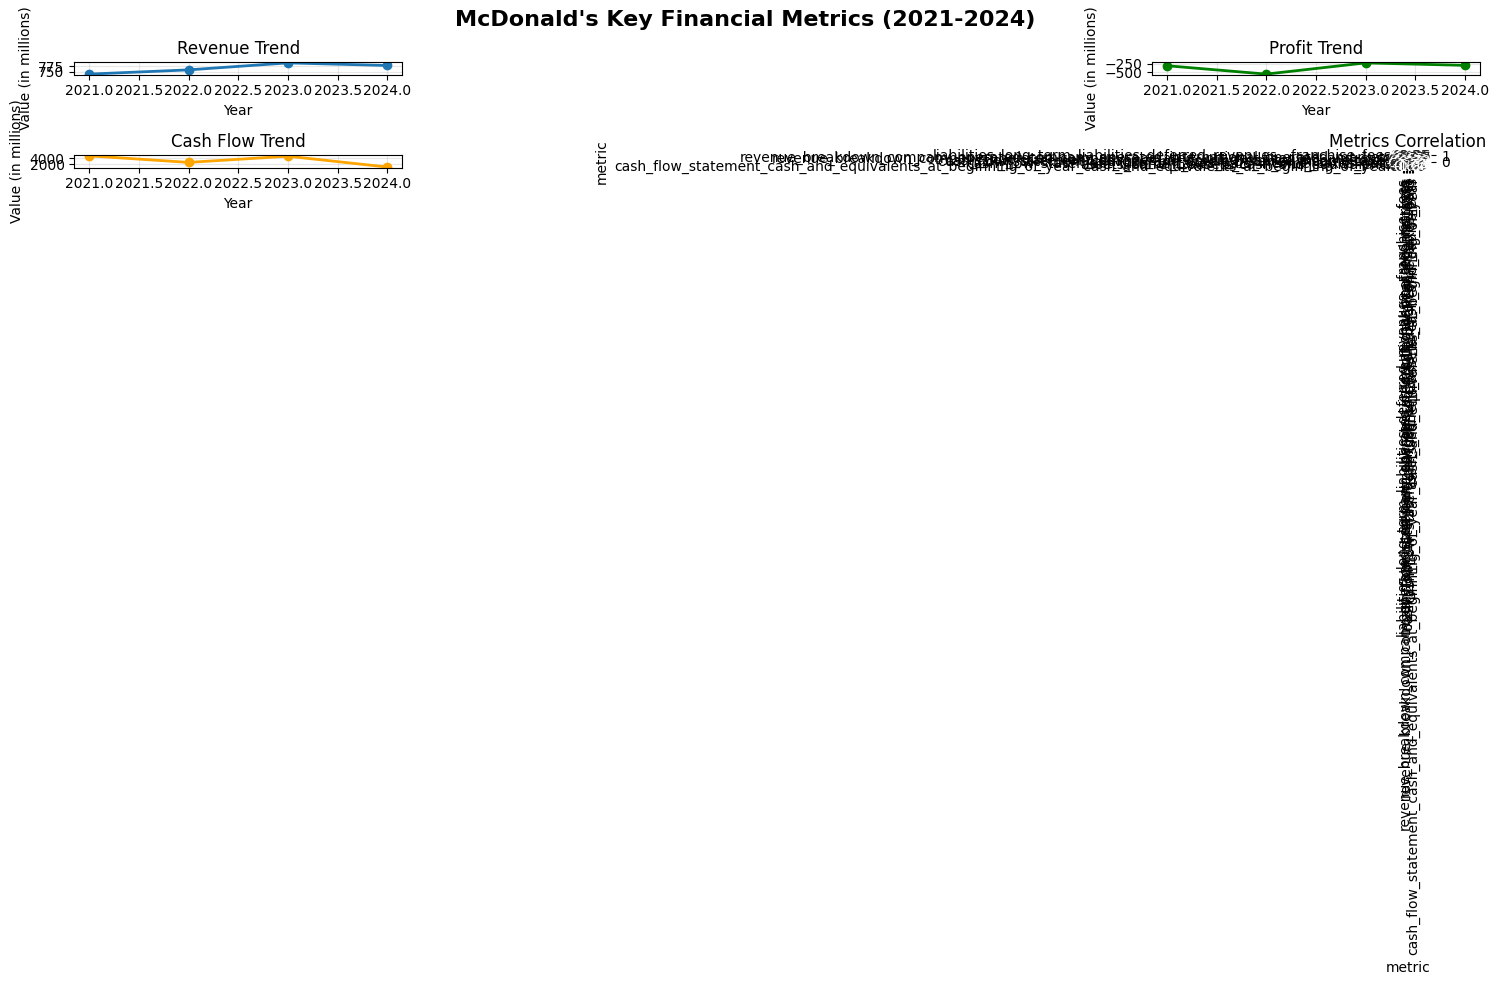

In [20]:
# Visualize key metrics over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('McDonald\'s Key Financial Metrics (2021-2024)', fontsize=16, fontweight='bold')

# Plot revenue trends
if revenue_metrics:
    axes[0,0].plot(pivot_df.index, pivot_df[revenue_metrics[0]], marker='o', linewidth=2)
    axes[0,0].set_title('Revenue Trend')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Value (in millions)')
    axes[0,0].grid(True, alpha=0.3)

# Plot profit trends
if profit_metrics:
    axes[0,1].plot(pivot_df.index, pivot_df[profit_metrics[0]], marker='o', linewidth=2, color='green')
    axes[0,1].set_title('Profit Trend')
    axes[0,1].set_xlabel('Year')
    axes[0,1].set_ylabel('Value (in millions)')
    axes[0,1].grid(True, alpha=0.3)

# Plot cash flow trends
if cash_metrics:
    axes[1,0].plot(pivot_df.index, pivot_df[cash_metrics[0]], marker='o', linewidth=2, color='orange')
    axes[1,0].set_title('Cash Flow Trend')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Value (in millions)')
    axes[1,0].grid(True, alpha=0.3)

# Plot correlation heatmap of top metrics
top_metrics = (revenue_metrics[:3] + profit_metrics[:3] + cash_metrics[:2])[:8]
if top_metrics:
    corr_data = pivot_df[top_metrics].corr()
    sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1,1], fmt='.2f', square=True)
    axes[1,1].set_title('Metrics Correlation')

plt.tight_layout()
plt.show()

In [21]:
# Prepare data for machine learning
# Create features for prediction
ml_df = pivot_df.copy()

# Fill missing values with forward fill then backward fill
ml_df = ml_df.fillna(method='ffill').fillna(method='bfill')

# Select top features with least missing values
feature_completeness = ml_df.count() / len(ml_df)
good_features = feature_completeness[feature_completeness > 0.5].index.tolist()

print(f"Selected {len(good_features)} features with >50% completeness")
ml_ready_df = ml_df[good_features]

print(f"\nML-ready dataset shape: {ml_ready_df.shape}")
print(f"Missing values: {ml_ready_df.isnull().sum().sum()}")

# Save processed data
ml_ready_df.to_csv('../data/processed_mcdonalds_data.csv')
clean_df.to_csv('../data/clean_mcdonalds_data.csv', index=False)

print("\nProcessed data saved to:")
print("- ../data/processed_mcdonalds_data.csv")
print("- ../data/clean_mcdonalds_data.csv")

Selected 85 features with >50% completeness

ML-ready dataset shape: (4, 85)
Missing values: 0

Processed data saved to:
- ../data/processed_mcdonalds_data.csv
- ../data/clean_mcdonalds_data.csv


In [22]:
# Summary statistics
print("Summary Statistics for ML-Ready Dataset:")
print(ml_ready_df.describe())

Summary Statistics for ML-Ready Dataset:
metric  assets_current_assets_accounts_and_notes_receivable  \
count                                            4.000000     
mean                                          2214.600000     
std                                            276.963969     
min                                           1872.400000     
25%                                           2054.350000     
50%                                           2249.000000     
75%                                           2409.250000     
max                                           2488.000000     

metric  assets_current_assets_cash_and_equivalents  \
count                                     4.000000   
mean                                   3239.250000   
std                                    1734.559582   
min                                    1085.000000   
25%                                    2209.100000   
50%                                    3581.400000   
75%          